## ***Employee Turnover Analytics***

---



---



In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing and checking the dataset
emp0 = pd.read_excel('/content/1688640705_hr_comma_sep.xlsx')

In [3]:
emp0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
emp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
emp0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [6]:
emp0.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [7]:
emp0.department.value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

##### Conclusion : The given Dataset has NO NULL values.

## Creating Heatmap of Correlation Matrix.

In [8]:
emp1 = emp0.copy()

In [9]:
emp1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
emp1.drop(['department','salary'],axis=1,inplace=True)

In [11]:
corr_matrix = emp1.corr()

In [12]:
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


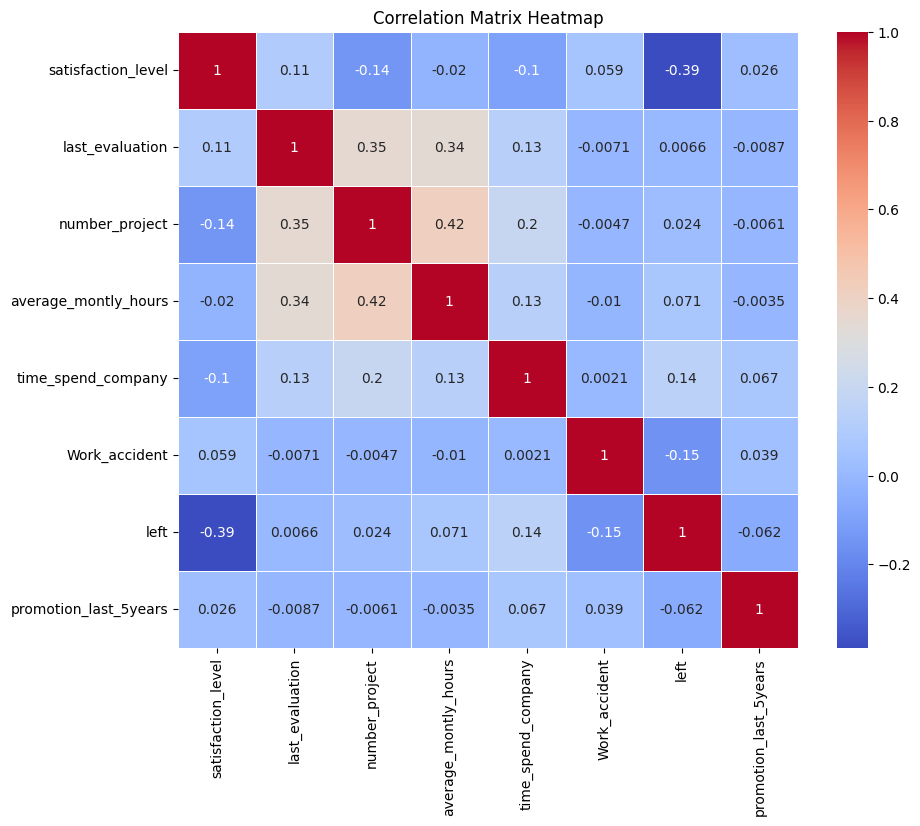

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


##Distribution Plot of
■	Employee Satisfaction (use column satisfaction_level)
■	Employee Evaluation (use column last_evaluation)
■	Employee Average Monthly Hours (use column average_montly_hours).


<Axes: xlabel='satisfaction_level', ylabel='Count'>

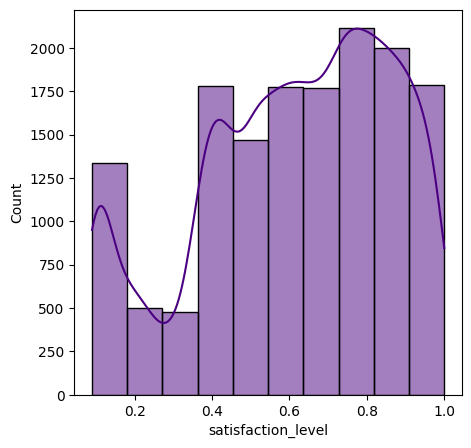

In [14]:
plt.figure(figsize=(5, 5))
sns.histplot(emp0['satisfaction_level'],kde=True,bins=10,color='indigo')

<Axes: xlabel='last_evaluation', ylabel='Count'>

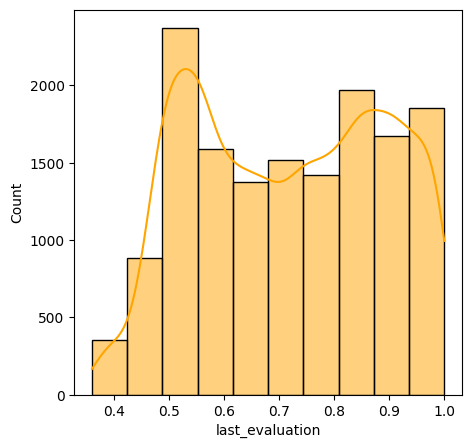

In [15]:
plt.figure(figsize=(5, 5))
sns.histplot(emp0['last_evaluation'],kde=True,bins=10,color='orange')

<Axes: xlabel='average_montly_hours', ylabel='Count'>

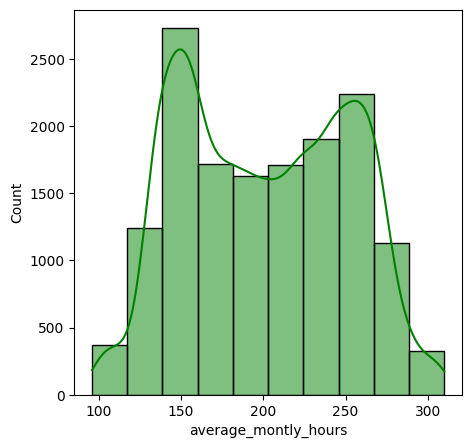

In [16]:
plt.figure(figsize=(5, 5))
sns.histplot(emp0['average_montly_hours'],kde=True,bins=10,color='green')

###Bar plot of Employee Project Count of both employees who left and who stayed in the organization

---



<Axes: ylabel='left'>

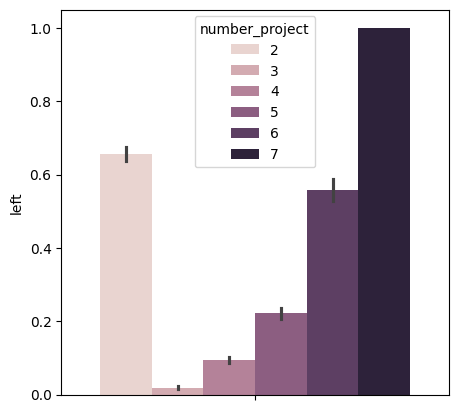

In [17]:
plt.figure(figsize=(5,5))
sns.barplot(y='left', hue='number_project', data=emp0)

Inference from the plot.


*   Employs who stay in the company has done maximum no. of projects.
*   Employs who left the company has done minimum no. of the projects.


*   Employs with minimum no. of projects and maximum no. of project left the company.





##Clustering of Employees who left based on their satisfaction and

---

evaluation.

In [18]:
left_data = emp0[emp0['left']==1]

In [19]:
feature=['satisfaction_level','last_evaluation']

In [20]:
X=left_data[feature]

In [21]:
from sklearn.cluster import KMeans

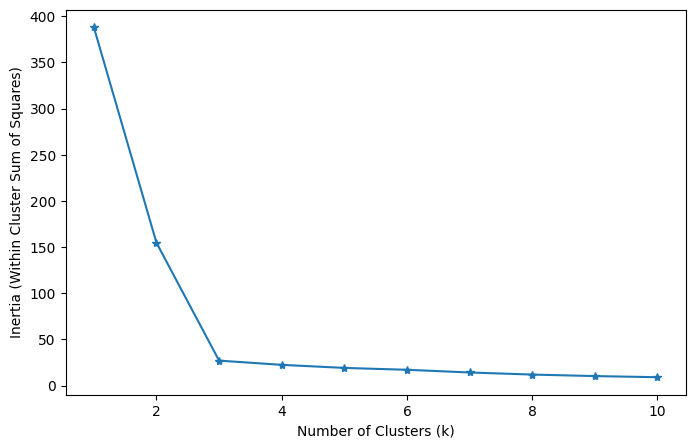

In [22]:
inertia = []
for k in range(1, 11):  # Trying values from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='*')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within Cluster Sum of Squares)')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, random_state=123)  # Use the number of clusters determined earlier
kmeans.fit(X)
left_data['cluster'] = kmeans.labels_

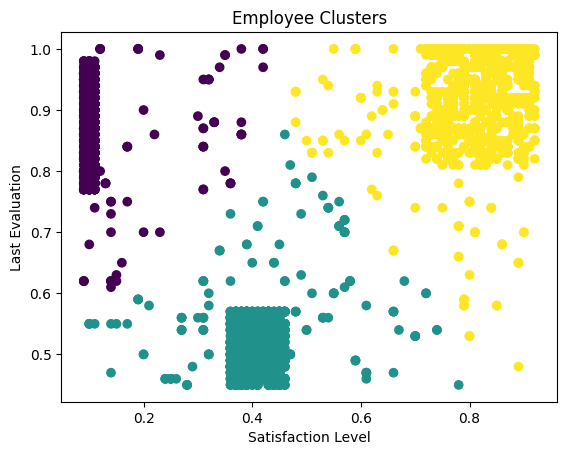

In [24]:
plt.scatter(left_data['satisfaction_level'], left_data['last_evaluation'], c=left_data['cluster'], cmap='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Employee Clusters')
plt.show()

###Handle the left Class Imbalance using SMOTE technique

---



In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn.metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [26]:
emp1=emp0.copy()

In [27]:
emp1 = pd.get_dummies(emp1,drop_first=True)

In [28]:
# Separate features and target
X = emp1.drop("left", axis=1)
y = emp1["left"]

# Stratified train-test split
sss = StratifiedShuffleSplit(test_size=0.2, random_state=123)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

##Perform 5-Fold cross-validation model training and evaluate performance.

---



---



##Logistic regression model with 5-Fold CV, Classification Report,

---

Confusion Matrix.

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     11428
           1       0.52      0.36      0.43      3571

    accuracy                           0.77     14999
   macro avg       0.67      0.63      0.64     14999
weighted avg       0.75      0.77      0.75     14999



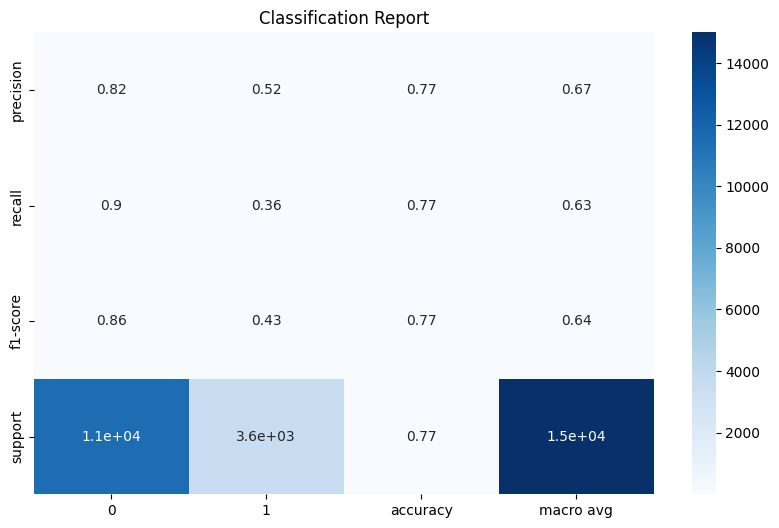

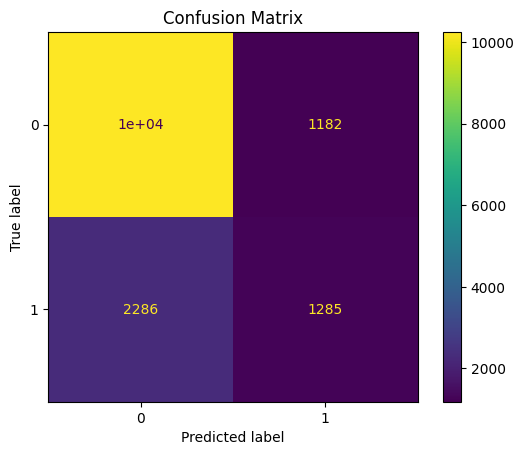

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset
data = emp1
X, y = emp1.drop("left", axis=1), emp1['left']

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Define 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5)

# Generate cross-validated predictions
y_pred = cross_val_predict(log_reg, X, y, cv=kf)

# Generate classification report
report = classification_report(y, y_pred, output_dict=True)
print(classification_report(y, y_pred))

# Convert report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title('Classification Report')
plt.show()

# Plot confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.title('Confusion Matrix')
plt.show()




##Random Forest Classifier model with 5-Fold CV, Classification Report,Confusion Matrix.

---



              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.97      0.98      3571

    accuracy                           0.99     14999
   macro avg       0.99      0.99      0.99     14999
weighted avg       0.99      0.99      0.99     14999



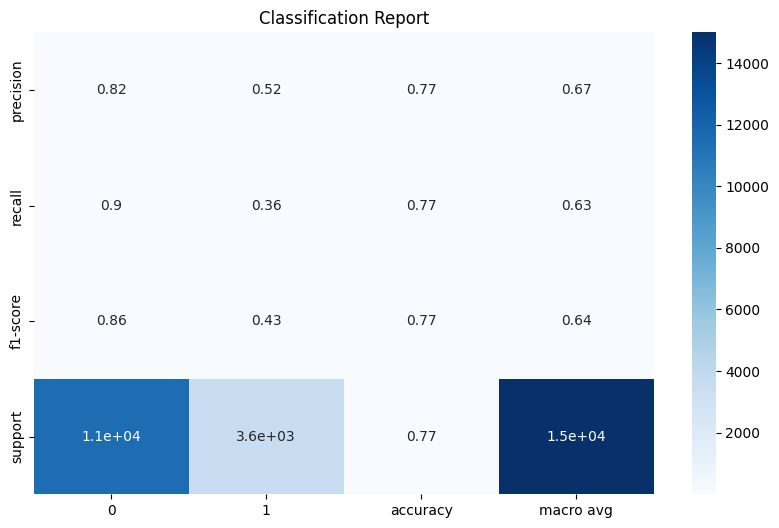

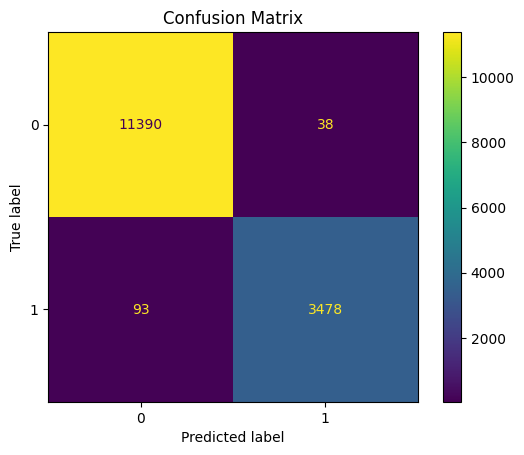

In [30]:
data = emp1
X, y = emp1.drop("left", axis=1), emp1['left']

# Initialize Logistic Regression model
ran_for= RandomForestClassifier(n_estimators=100)

# Define 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5)

# Generate cross-validated predictions
y_pred = cross_val_predict(ran_for, X, y, cv=kf)

# Generate classification report
report = classification_report(y, y_pred, output_dict=True)
print(classification_report(y, y_pred))

# Plot classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title('Classification Report')
plt.show()

# Plot confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.title('Confusion Matrix')
plt.show()


##Gradient Boost Classifier model with 5-Fold CV, Classification Report,

---

Confusion Matrix.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11428
           1       0.96      0.93      0.94      3571

    accuracy                           0.97     14999
   macro avg       0.97      0.96      0.96     14999
weighted avg       0.97      0.97      0.97     14999



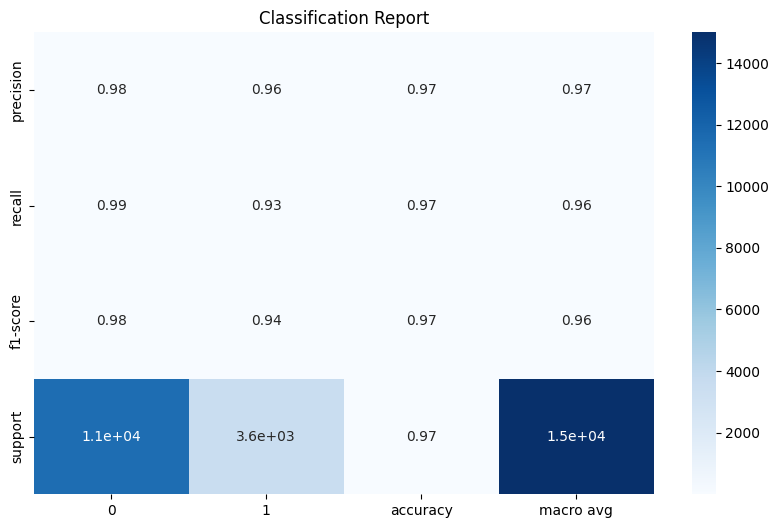

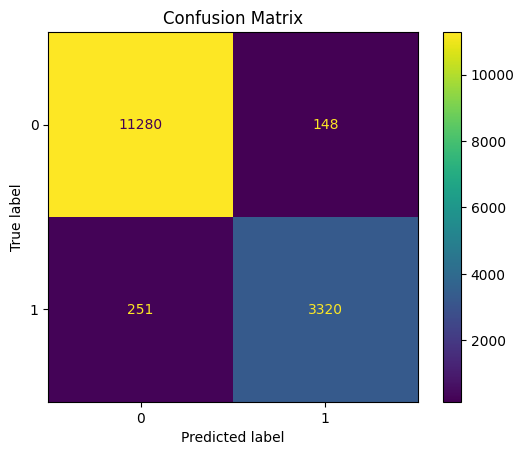

In [31]:
data = emp1
X, y = emp1.drop("left", axis=1), emp1['left']

# Initialize Logistic Regression model
grad_boost= GradientBoostingClassifier()

# Define 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5)

# Generate cross-validated predictions
y_pred = cross_val_predict(grad_boost, X, y, cv=kf)

# Generate classification report
report = classification_report(y, y_pred, output_dict=True)
print(classification_report(y, y_pred))

# Convert report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title('Classification Report')
plt.show()

# Plot confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.title('Confusion Matrix')
plt.show()


##ROC and AUC curve for  Logistic Regression,Random forest classifier,Gradient boosting classifier.


---



In [32]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

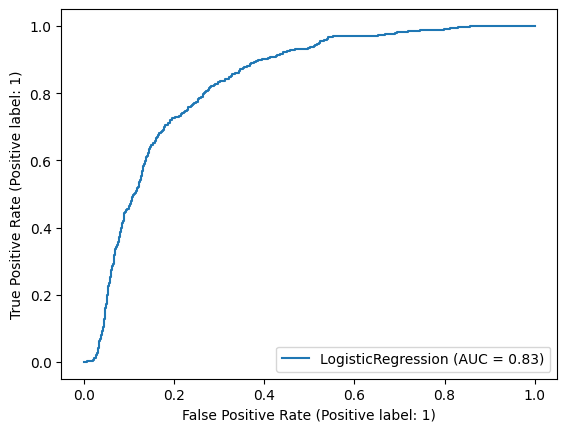

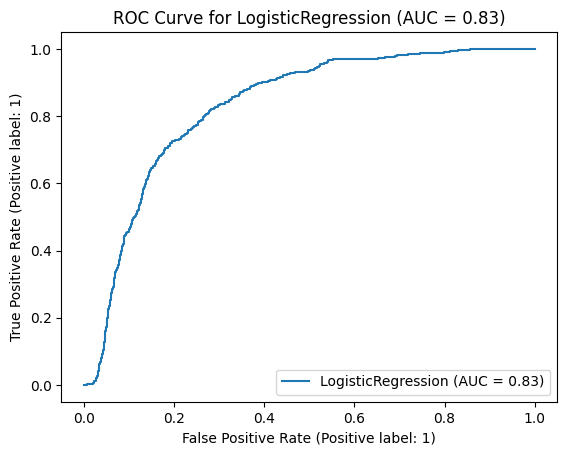

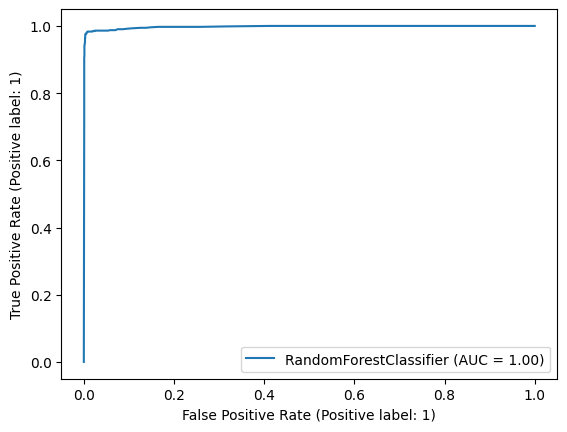

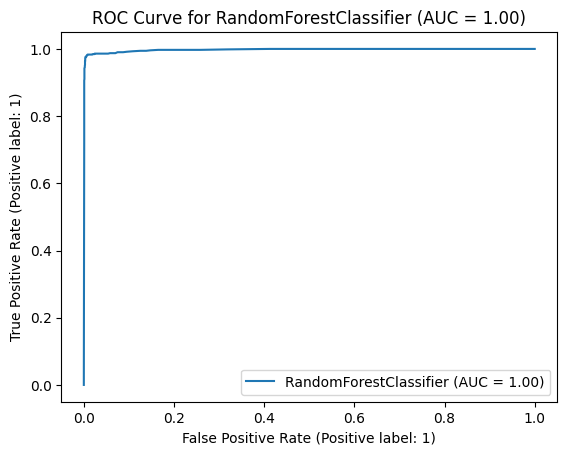

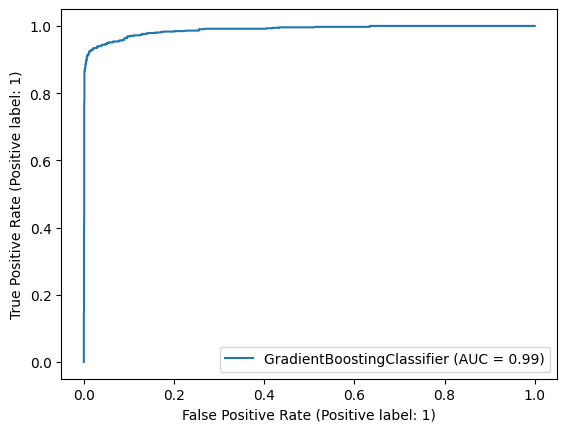

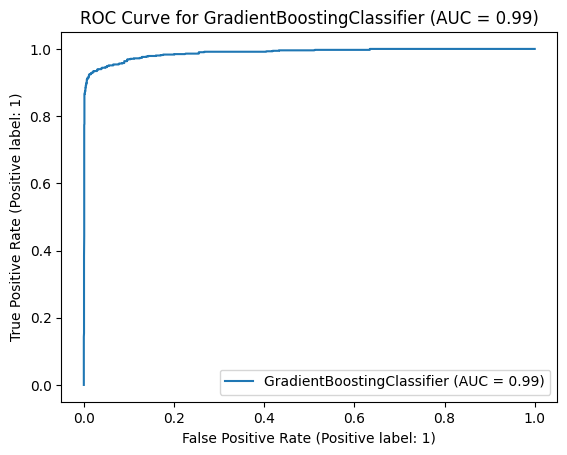

In [33]:
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Create a display object for plotting the ROC curve
    display = RocCurveDisplay.from_estimator(model, X_test, y_test)
    display.plot()  # Plot the ROC curve
    plt.title(f'ROC Curve for {model.__class__.__name__} (AUC = {roc_auc:.2f})')
    plt.show()

##Retention strategies for targeted employees.

---







In [42]:
y_pred_proba = ran_for.fit(X_train,y_train)
prediction = ran_for.predict(X_test)

In [46]:
# Defining thresholds for risk zones:
green_threshold = 0.2
yellow_threshold = 0.6
orange_threshold = 0.9

# Categorize employees based on probability scores:
if (prediction < green_threshold).any():
    print("Safe Zone (Green): Continue recognizing their contributions to maintain high morale.Offer opportunities for growth and development to keep them motivated.")

elif ((prediction >= green_threshold) & (prediction < yellow_threshold)).any():
    print("Low Risk Zone (Yellow): Investigate dissatisfaction causes.Provide training and development programs to enhance their skills.")

elif ((prediction >= yellow_threshold) & (prediction < orange_threshold)).any():
    print("Medium Risk Zone (Orange):Conduct one-on-one meetings to understand and address their specific issues..")

elif (prediction >= orange_threshold).any():
    print("High Risk Zone (Red): Take swift action to address their concerns and show that the company values them.")


Safe Zone (Green): Continue recognizing their contributions to maintain high morale.Offer opportunities for growth and development to keep them motivated.
